In [184]:
#!pip install numpy pandas matplotlib seaborn scikit-learn xgboost

In [185]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [186]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Preprocessing

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [188]:
data.shape

(1338, 7)

In [189]:
#Statistic informations
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [190]:
data.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [191]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [192]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [193]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

#### grouping of datasets

##### groub by sex

In [194]:
data.groupby('sex').mean(numeric_only=True)

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


##### group by smoker

In [195]:
data.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


##### group by region


In [196]:
data.groupby('region').mean(numeric_only=True)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


#### Missing value Treatment

In [197]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### One hot Encoding

In [198]:
data = pd.get_dummies(data=data,drop_first=True)
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [199]:
data.shape

(1338, 9)

#### correlation matrix & Heat map


In [200]:
data2 = data.drop(columns='charges')

<Axes: >

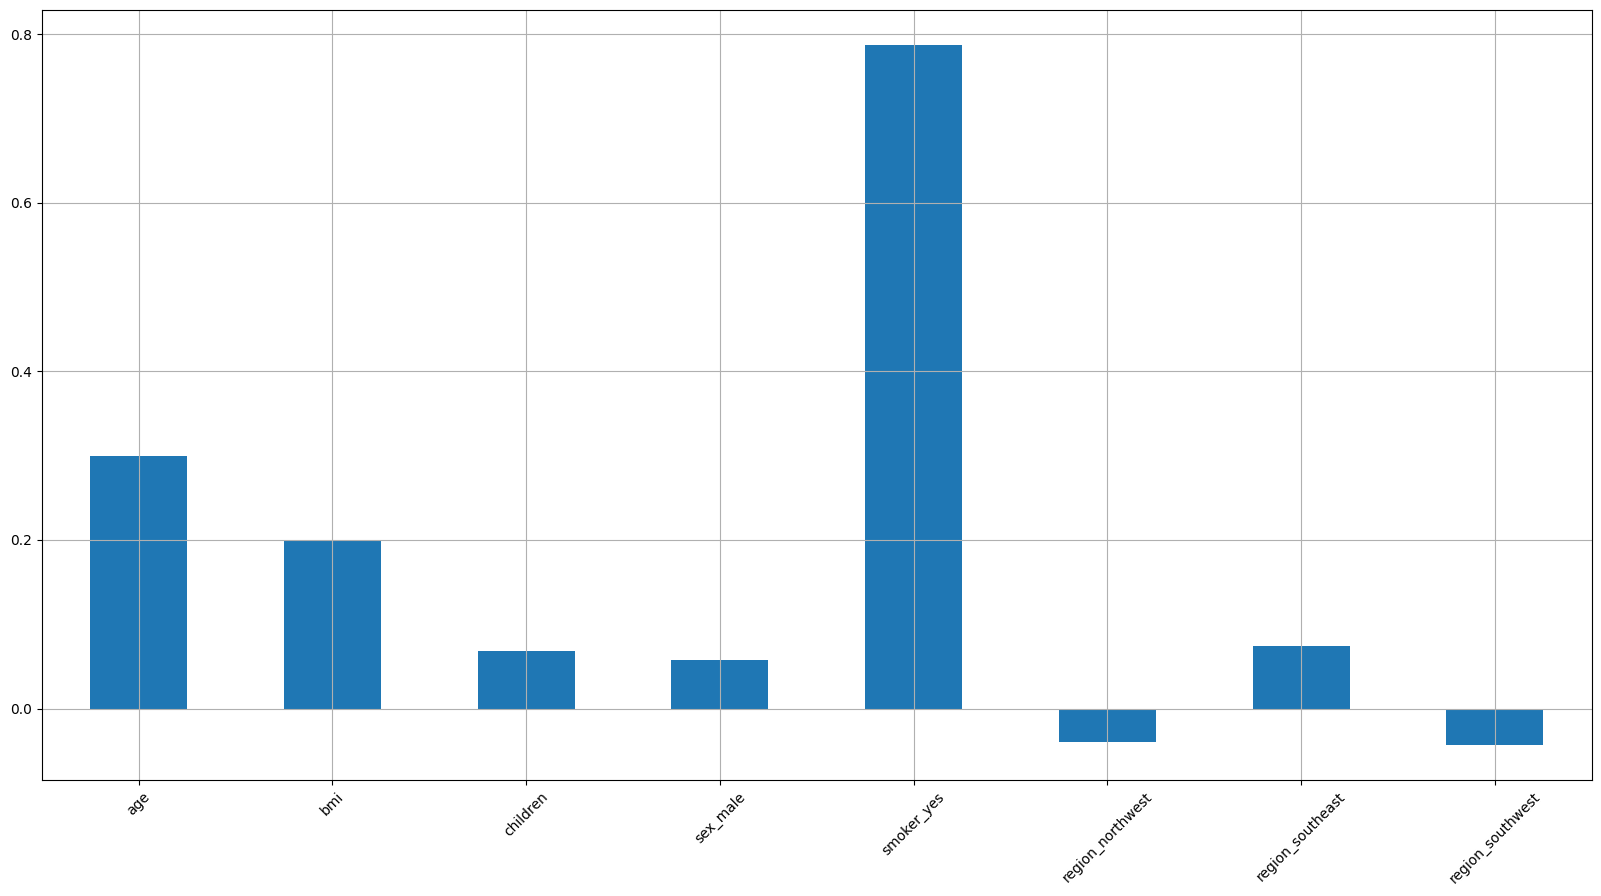

In [201]:
data2.corrwith(data['charges']).plot.bar(
    figsize=(20,10),rot=45,grid=True
)

In [202]:
corr = data.corr()
corr.shape

(9, 9)

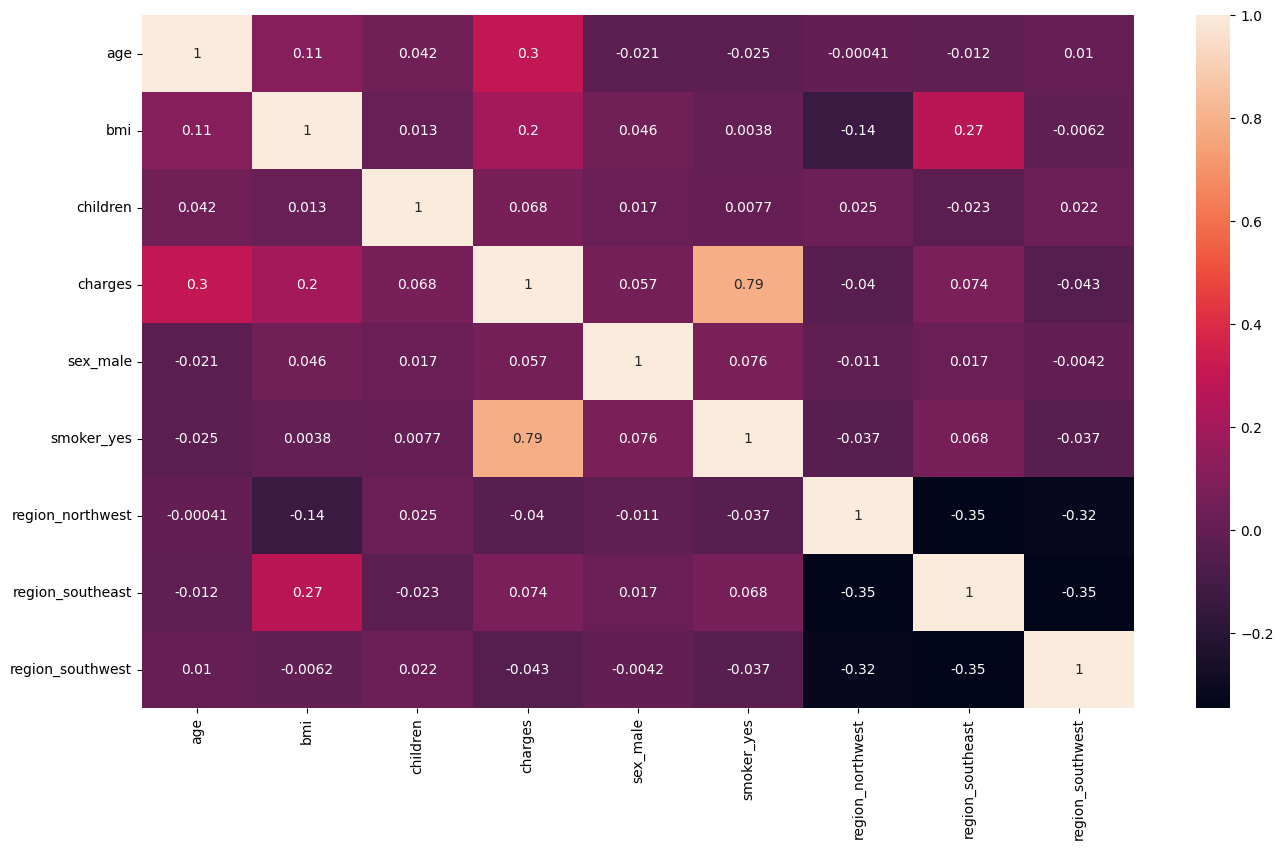

In [203]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)
plt.show()

### Machine Learning Techniques

#### split data to train and test 

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X = data.drop(columns='charges')
y = data['charges']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

#### applying standard scalar

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
sc = StandardScaler()

In [209]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

### Building the model

#### Linear Regression

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
LR = LinearRegression()

In [212]:
LR.fit(X_train,y_train)

LinearRegression()

In [213]:
y_pred = LR.predict(X_test)

##### Valuation

In [214]:
from sklearn.metrics import r2_score

In [215]:
r2_score(y_true=y_test,y_pred=y_pred)

0.7999876970680434

#### Random forest Regression

In [216]:
from sklearn.ensemble import RandomForestRegressor

In [217]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [218]:
y_pred = RF.predict(X_test)

In [219]:
r2_score(y_test,y_pred)

0.8822952468395856

#### XGBoost Regression

In [220]:
from xgboost import XGBRegressor

In [221]:
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [222]:
y_pred = XGB.predict(X_test)

In [223]:
r2_score(y_test,y_pred)

0.8630684668596162

### Single Observation


In [ ]:
#name,age,sex,bmi,children,smoker,region,charges
#priti,19,female,27.9,0,yes,southwest,16884.924

In [224]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [236]:
priti_obs = [[19,27.9,0,0,1,0,0,1]]

In [232]:
XGB.predict(sc.transform(priti_obs))

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([34451.78], dtype=float32)

In [237]:
RF.predict(sc.transform(priti_obs))

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([16890.8503505])

In [238]:
LR.predict(sc.transform(priti_obs))

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25208.66703398])

In [239]:
#Random forest Regression is the best for this project 